In [5]:
#! pip install --upgrade scikit-learn
#! pip install scikit-plot

In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import scikitplot as skplt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import (roc_auc_score,roc_curve,auc,accuracy_score,classification_report,precision_recall_curve,recall_score)

from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix, accuracy_score, f1_score



In [54]:
dataset_path = "training_project_data.csv"
df = pd.read_csv(dataset_path);
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
0,150000.0,2,2,2,24,1,2,0,0,0,...,17853.0,34527.0,28277.0,0.0,2145.0,10000.0,22000.0,3000.0,5093.0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,30748.0,30162.0,30016.0,0.0,0.0,0.0,0.0,3100.0,798.0,1
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,6784.0,6923.0,14116.0,0.0,0.0,6784.0,159.0,167.0,760.0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,55182.0,48983.0,50136.0,3500.0,2000.0,20000.0,2000.0,2000.0,2000.0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,47026.0,45971.0,47573.0,0.0,6500.0,1800.0,0.0,2500.0,2000.0,0


In [55]:
df.iloc[0]

LIMIT_BAL             150000.0
SEX                        2.0
EDUCATION                  2.0
MARRIAGE                   2.0
AGE                       24.0
PAY_1                      1.0
PAY_2                      2.0
PAY_3                      0.0
PAY_4                      0.0
PAY_5                      0.0
PAY_6                      0.0
BILL_AMT1              65542.0
BILL_AMT2              28311.0
BILL_AMT3              23978.0
BILL_AMT4              17853.0
BILL_AMT5              34527.0
BILL_AMT6              28277.0
PAY_AMT1                   0.0
PAY_AMT2                2145.0
PAY_AMT3               10000.0
PAY_AMT4               22000.0
PAY_AMT5                3000.0
PAY_AMT6                5093.0
NEXT_MONTH_DEFAULT         0.0
Name: 0, dtype: float64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           10000 non-null  float64
 1   SEX                 10000 non-null  int64  
 2   EDUCATION           10000 non-null  int64  
 3   MARRIAGE            10000 non-null  int64  
 4   AGE                 10000 non-null  int64  
 5   PAY_1               10000 non-null  int64  
 6   PAY_2               10000 non-null  int64  
 7   PAY_3               10000 non-null  int64  
 8   PAY_4               10000 non-null  int64  
 9   PAY_5               10000 non-null  int64  
 10  PAY_6               10000 non-null  int64  
 11  BILL_AMT1           10000 non-null  float64
 12  BILL_AMT2           10000 non-null  float64
 13  BILL_AMT3           10000 non-null  float64
 14  BILL_AMT4           10000 non-null  float64
 15  BILL_AMT5           10000 non-null  float64
 16  BILL_

In [57]:
for column in ["SEX","EDUCATION","MARRIAGE","PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"] :
    df[column] = df[column].astype(str)
df.dtypes

LIMIT_BAL             float64
SEX                    object
EDUCATION              object
MARRIAGE               object
AGE                     int64
PAY_1                  object
PAY_2                  object
PAY_3                  object
PAY_4                  object
PAY_5                  object
PAY_6                  object
BILL_AMT1             float64
BILL_AMT2             float64
BILL_AMT3             float64
BILL_AMT4             float64
BILL_AMT5             float64
BILL_AMT6             float64
PAY_AMT1              float64
PAY_AMT2              float64
PAY_AMT3              float64
PAY_AMT4              float64
PAY_AMT5              float64
PAY_AMT6              float64
NEXT_MONTH_DEFAULT      int64
dtype: object

In [58]:
df['NEXT_MONTH_DEFAULT'].value_counts()

0    7805
1    2195
Name: NEXT_MONTH_DEFAULT, dtype: int64

In [59]:
df.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,168182.000000,35.39600,51490.560500,49298.972000,47292.40850,43605.665800,40347.829700,38996.784300,5511.82970,5.931217e+03,5385.050600,4585.585700,4712.134300,5055.019400,0.219500
std,130118.668771,9.19536,74906.094564,71808.952137,69398.13263,65062.788893,61044.676044,59682.999879,14748.85889,2.204220e+04,18527.041096,14066.147593,14080.847065,17359.210922,0.413929
min,10000.000000,21.00000,-11545.000000,-24704.000000,-157264.00000,-65167.000000,-23003.000000,-339603.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.00000,3388.000000,3016.500000,2561.75000,2400.000000,1703.250000,1300.750000,1000.00000,7.492500e+02,390.000000,277.250000,300.000000,150.750000,0.000000
50%,140000.000000,34.00000,22896.500000,21576.000000,20370.50000,19194.000000,18261.000000,17338.000000,2163.50000,2.001000e+03,1800.000000,1500.000000,1543.000000,1500.000000,0.000000
75%,240000.000000,41.00000,67834.750000,64243.500000,60783.25000,55731.250000,50491.000000,49696.000000,5001.00000,5.000000e+03,4651.500000,4014.250000,4100.000000,4000.000000,0.000000
max,1000000.000000,75.00000,964511.000000,983931.000000,689643.00000,891586.000000,927171.000000,961664.000000,493358.00000,1.227082e+06,896040.000000,432130.000000,417990.000000,422000.000000,1.000000


In [60]:
# Counting mode for objects:
for column in df.select_dtypes(include='object').columns:
    print(str(column)+'\n\n' +str(df[column].value_counts())+"\n")

SEX

2    6068
1    3932
Name: SEX, dtype: int64

EDUCATION

2    4678
1    3496
3    1674
5      90
4      42
6      18
0       2
Name: EDUCATION, dtype: int64

MARRIAGE

2    5332
1    4547
3     108
0      13
Name: MARRIAGE, dtype: int64

PAY_1

0     4895
-1    2852
1     1217
2      881
3      155
Name: PAY_1, dtype: int64

PAY_2

0     5178
-1    3318
2     1318
3      175
1       11
Name: PAY_2, dtype: int64

PAY_3

0     5200
-1    3379
2     1288
3      131
1        2
Name: PAY_3, dtype: int64

PAY_4

0     5459
-1    3360
2     1064
3      117
Name: PAY_4, dtype: int64

PAY_5

0     5601
-1    3398
2      894
3      107
Name: PAY_5, dtype: int64

PAY_6

0     5394
-1    3585
2      927
3       94
Name: PAY_6, dtype: int64



In [61]:
df.loc[df['EDUCATION'] == '0','EDUCATION'] = df['EDUCATION'].mode()[0];
df.loc[df['MARRIAGE'] == '0', 'MARRIAGE'] = df['MARRIAGE'].mode()[0];
df['IS_MALE']=df['SEX'].map({'1':'1','2':'0'}).astype(int);

In [62]:
for column in df.select_dtypes(include='object').columns[1:]:
    df=pd.concat([df,pd.get_dummies(df[column],prefix=column)],axis=1)

In [63]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_4_2,PAY_4_3,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3
0,150000.0,2,2,2,24,1,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,0,1,0,0,1,0,0,1,0,0
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,0,0,0,1,0,0,0,1,0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,1,0,0,0,1,0,0,1,0,0


In [64]:
df.to_csv("prepared_dataset.csv",index=False,encoding='utf-8')

In [65]:
X = df.drop(columns="NEXT_MONTH_DEFAULT")
Y = df["NEXT_MONTH_DEFAULT"]

In [66]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, shuffle=True, random_state=2)

In [67]:
%%time
tree = DecisionTreeClassifier(random_state=1);
param_grid=[{
    'max_depth':range(1,7),
    'min_samples_leaf':range(1,7)
}]
grid_search = GridSearchCV(tree,param_grid,cv=5)
grid_search.fit(x_train,y_train)
tree = grid_search.best_estimator_

CPU times: total: 17.1 s
Wall time: 17.4 s


In [68]:
tree

DecisionTreeClassifier(max_depth=3, random_state=1)

In [69]:
pred_train = tree.predict(x_train);
pred_test = tree.predict(x_test);

accruracy_train = accuracy_score(y_train,pred_train);
accuracy_test = accuracy_score(y_test,pred_test);

print("A_test={} A_train={}".format(accuracy_test,accruracy_train));

A_test=0.82 A_train=0.827375


In [70]:
conf_matrix = confusion_matrix(y_test,pred_test);
print ("Confusion matrix=\n{}".format(conf_matrix));

Confusion matrix=
[[1503   84]
 [ 276  137]]


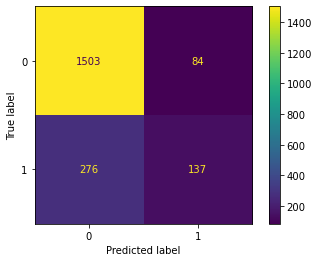

In [71]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=tree.classes_).plot()

In [72]:
class_report = classification_report(y_test,pred_test);
print ("Classification report: \n{}".format(class_report));

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1587
           1       0.62      0.33      0.43       413

    accuracy                           0.82      2000
   macro avg       0.73      0.64      0.66      2000
weighted avg       0.80      0.82      0.80      2000



In [73]:
micro = f1_score(y_test,pred_test,average='micro');
macro = f1_score(y_test,pred_test,average='macro');
weighted = f1_score(y_test,pred_test,average='weighted');
print ("{} {} {}".format(micro,macro,weighted));

0.82 0.6626123922468328 0.7978781693348403


micro - стандартный способ без дополнительных делений и усреднений
macro - в этом случае например f1 - это средина между первым и вторым f1 = (f1(1)+f1(2))/2
weighted - в этом случае f1 = w1*f1(1)+w2*f2(2). wi - это доля первого класса


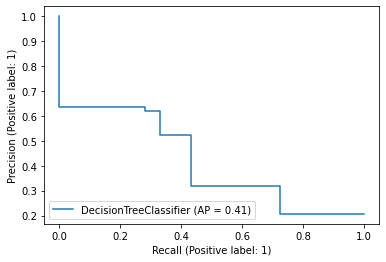

In [74]:
PrecisionRecallDisplay.from_estimator(tree,x_test,y_test)

C:\Users\Alex\DevProgs\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  return fun(*args, **kwargs)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

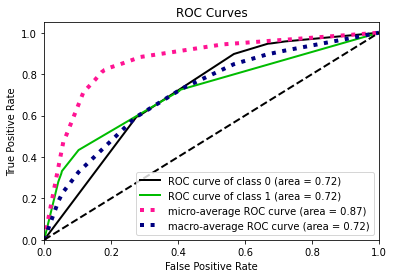

In [75]:
pred_probability_test = tree.predict_proba(x_test);
skplt.metrics.plot_roc_curve(y_test,pred_probability_test)


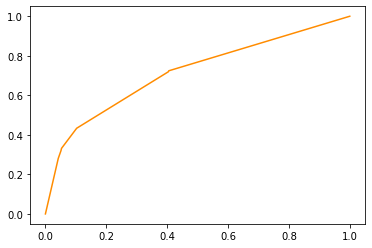

In [76]:
fpr,tpr,thresholds = roc_curve(y_test,pred_probability_test[:,1])
roc_auc = auc(fpr,tpr)
plt.figure();
plt.plot(fpr,tpr,color="darkorange")
plt.show();

In [97]:
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

TARGET = "NEXT_MONTH_DEFAULT";
dataset_path = "training_project_data.csv"
df = pd.read_csv(dataset_path);
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
0,150000.0,2,2,2,24,1,2,0,0,0,...,17853.0,34527.0,28277.0,0.0,2145.0,10000.0,22000.0,3000.0,5093.0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,30748.0,30162.0,30016.0,0.0,0.0,0.0,0.0,3100.0,798.0,1
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,6784.0,6923.0,14116.0,0.0,0.0,6784.0,159.0,167.0,760.0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,55182.0,48983.0,50136.0,3500.0,2000.0,20000.0,2000.0,2000.0,2000.0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,47026.0,45971.0,47573.0,0.0,6500.0,1800.0,0.0,2500.0,2000.0,0


In [98]:
df[TARGET].value_counts()

0    7805
1    2195
Name: NEXT_MONTH_DEFAULT, dtype: int64

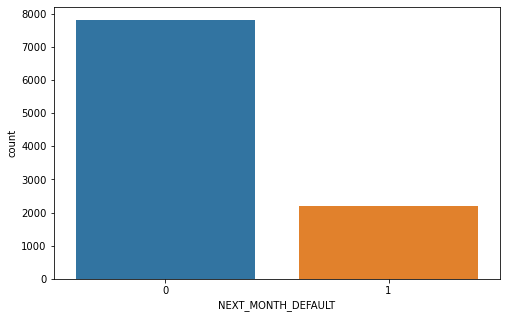

In [99]:
plt.figure(figsize=(8,5))
sns.countplot(x=TARGET,data=df)
plt.show()

In [100]:
df.corr().iloc[:-1,-1].sort_values(ascending=False)

PAY_1        0.354422
PAY_2        0.298940
PAY_3        0.266849
PAY_4        0.245114
PAY_5        0.239794
PAY_6        0.214903
AGE          0.022775
EDUCATION    0.019959
BILL_AMT5   -0.001822
BILL_AMT6   -0.004071
BILL_AMT4   -0.006049
BILL_AMT2   -0.006881
BILL_AMT3   -0.008493
BILL_AMT1   -0.013439
MARRIAGE    -0.023623
SEX         -0.043984
PAY_AMT4    -0.052268
PAY_AMT3    -0.055035
PAY_AMT6    -0.059099
PAY_AMT2    -0.060145
PAY_AMT5    -0.068498
PAY_AMT1    -0.074241
LIMIT_BAL   -0.146171
Name: NEXT_MONTH_DEFAULT, dtype: float64

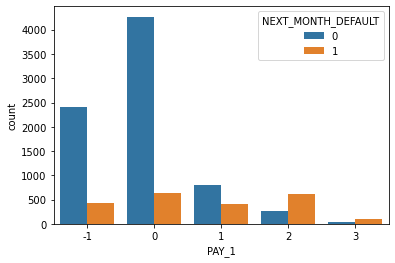

In [101]:
sns.countplot(x="PAY_1",hue=TARGET,data=df);
plt.show()

In [103]:
#pay1_target = df.loc[df['PAY_1'].isin([-1,0]),['id','PAY_1','NEXT_MONTH_DEFAULT']].sample(1000);
#pay1_target

In [104]:
#table = pay1_target.pivot_table(values="ID",index="PAY_1",columns="NEXT_MONTH_DEFAULT",aggfunc='count')

In [108]:
# Хи2 коэффициент Пирсона
chi2,p,dof,expected = chi2_contingency(df,correction=False)

ValueError: All values in `observed` must be nonnegative.

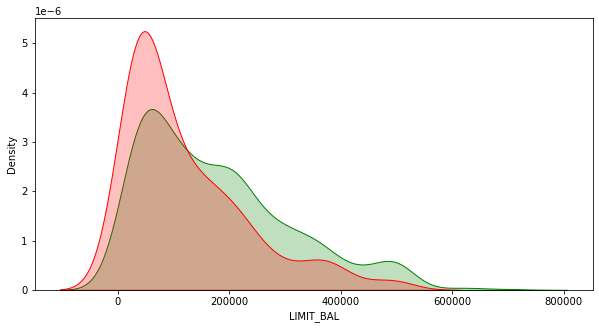

In [110]:
limit_ball_with_target = df[['LIMIT_BAL',TARGET]].sample(1000)
limit_ball = limit_ball_with_target['LIMIT_BAL'];
limit_ball_t1 = limit_ball[limit_ball_with_target[TARGET]==0];
limit_ball_t2 = limit_ball[limit_ball_with_target[TARGET]==1];

plt.figure(figsize=(10,5))
sns.kdeplot(limit_ball_t1, shade=True, color="g")
sns.kdeplot(limit_ball_t2, shade=True, color="r")
plt.show();

In [111]:
# Estimating difference between densities
shapiro(limit_ball)

ShapiroResult(statistic=0.8973352313041687, pvalue=2.633149908893695e-25)

pvalue - это уровень значимости. Даже 5 процентная значимость не получена, поэтому отвергается нормальность в распределении

<AxesSubplot:>

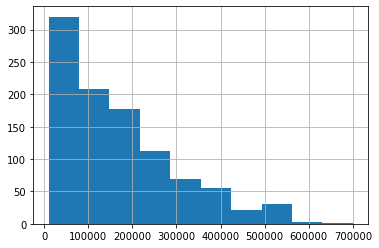

In [113]:
limit_ball.hist()

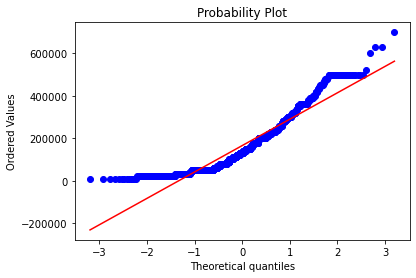

In [115]:
probplot(limit_ball, dist='norm',plot=plt)
plt.show();

Визуальная оценка подтверждает показания Шапиро-Уилка по поводу того, закон распределения отличный от нормального, мы не можем использовать критерий Стьюдента. Поэтому воспользуемся Маном-Уитни

In [117]:
mannwhitneyu(limit_ball_t1,limit_ball_t2)

MannwhitneyuResult(statistic=107497.5, pvalue=2.0040290124143815e-09)

pvalue - получается вновь малым по значимости

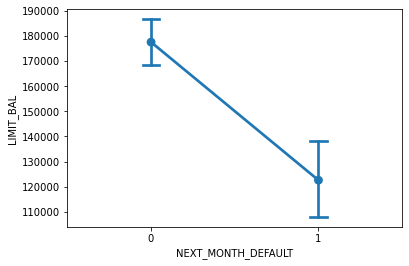

In [119]:
# Доверительный интервал 95% интервал
sns.pointplot(x=TARGET,y='LIMIT_BAL',data=limit_ball_with_target,capsize=0.1)
plt.show()

Доверительные интервалы не пересекаются а значит статистически значимые различия в средних показателях имеются. Если бы интервалы пересакаются то статистически значимые различия не наблюдаются.

Матрица корреляций

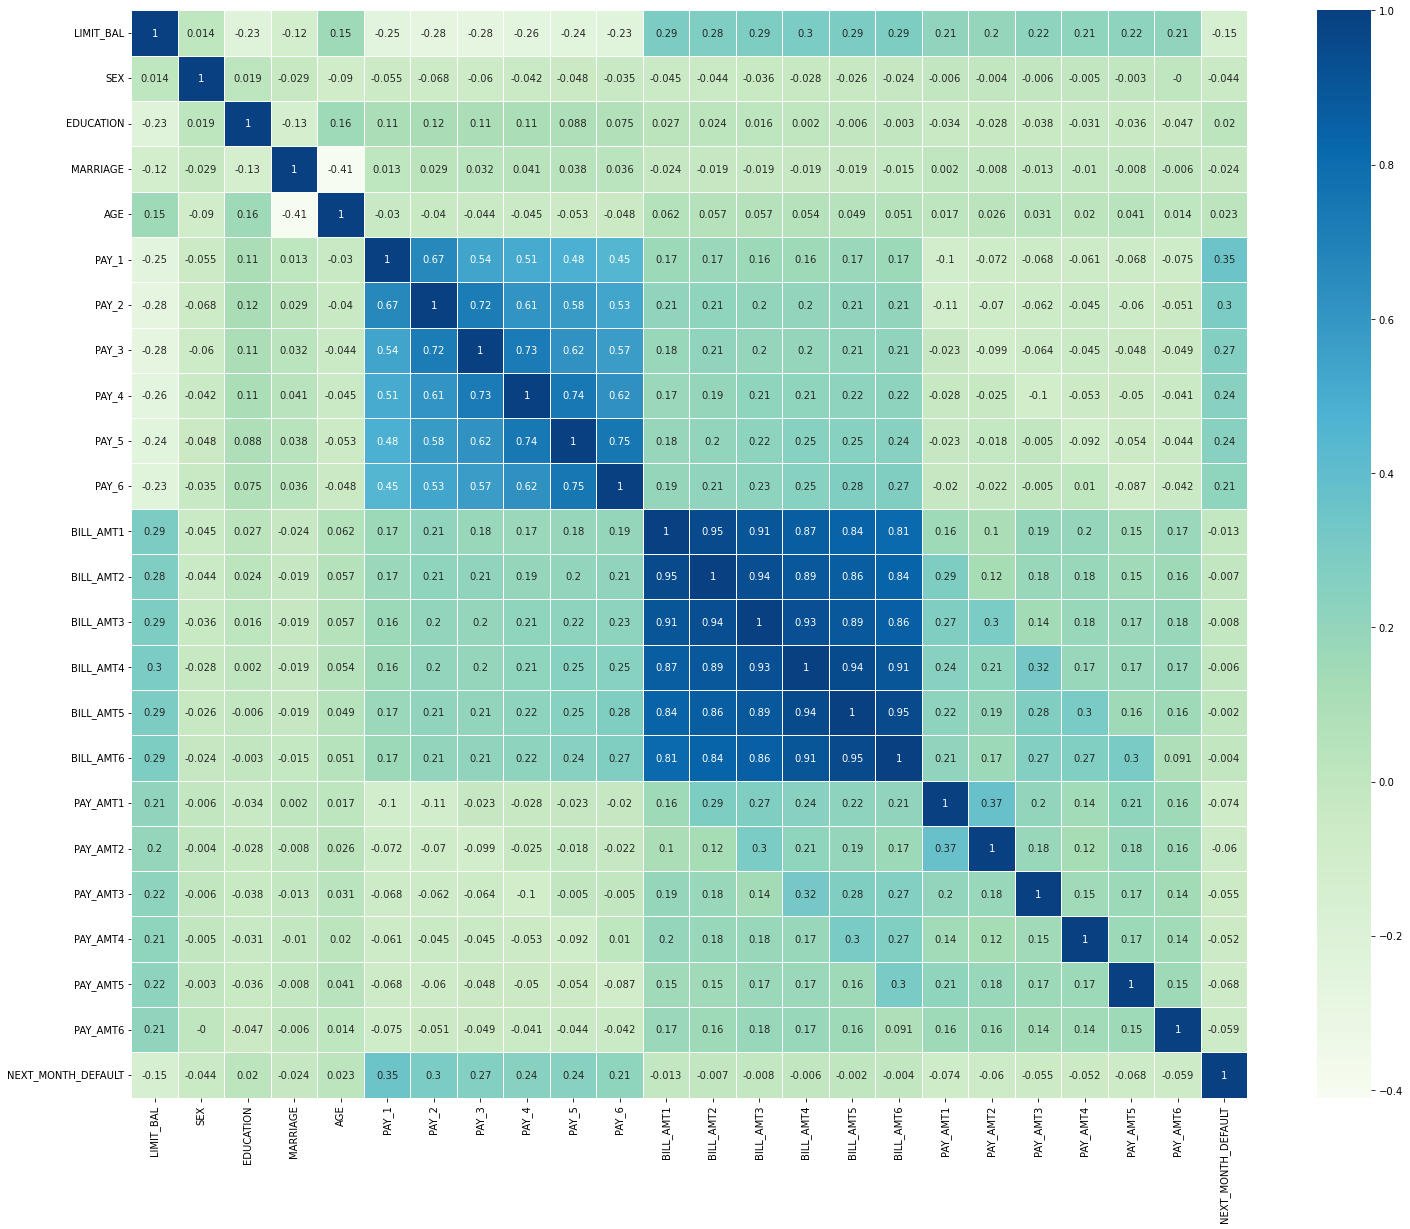

In [122]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr().round(3),annot=True,linewidths=0.5, cmap='GnBu')
plt.show()

Матрица корреляции показывает линейную связь между целевым и нецелевым признаком. Мультиколинеарность, а также какие признаки нужно убрать из модели.

___________________________________________<br>
Балансировка классов

In [124]:
#!pip install xgboost
#!pip install lightgbm
#!pip install catboost

In [126]:
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb


In [127]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print ("Train: \n{}".format(classification_report(y_train_true,y_train_pred)))
    print ("Test: \n{}".format(classification_report(y_test_true,y_test_pred)))
    print ("ConfMatrix: \n{}".format(pd.crosstab(y_test_true,y_test_pred)));


In [128]:
def balance_by_target(df,target_name):
    target_counts = df[target_name].value_counts();
    major_class_name = target_counts.argmax();
    minor_class_name = target_counts.argmin();
    disbalance_coef = int (target_counts[major_class_name]/target_counts[minor_class_name])-1
    for i in range(disbalance_coef):
        sample = df[df[target_name]==minor_class_name].sample(target_counts[minor_class_name]);
        df = df.append(sample,ignore_index=True)
    return df.sample(frac=1);

In [129]:
TARGET = "NEXT_MONTH_DEFAULT";
dataset_path = "training_project_data.csv"
df = pd.read_csv(dataset_path);
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,NEXT_MONTH_DEFAULT
0,150000.0,2,2,2,24,1,2,0,0,0,...,17853.0,34527.0,28277.0,0.0,2145.0,10000.0,22000.0,3000.0,5093.0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,30748.0,30162.0,30016.0,0.0,0.0,0.0,0.0,3100.0,798.0,1
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,6784.0,6923.0,14116.0,0.0,0.0,6784.0,159.0,167.0,760.0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,55182.0,48983.0,50136.0,3500.0,2000.0,20000.0,2000.0,2000.0,2000.0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,47026.0,45971.0,47573.0,0.0,6500.0,1800.0,0.0,2500.0,2000.0,0


In [ ]:
BASE_FEATURES = d